In [1]:
# インポート
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# MNISTデータセット

In [2]:
# データセットインストール
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(10000, 28, 28)
uint8


In [4]:
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [5]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

1.0
0.0
(60000,)
(60000, 10)
float64


# 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成

In [6]:
#　動作確認なし
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma=0.005):
        self.sigma = sigma
        
    def W(self):
        W = self.sigma * np.random.randn(self.F)
        pass
        return W
    
    def B(self):
        B = self.sigma * np.random.randn(self.S)
        pass
        return B

In [7]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.001):
        self.lr = lr
    def update(self, layer):
        layer.W = layer.W - self.lr*layer.dW
        layer.B = layer.B - self.lr*layer.dB.mean(axis=0)
        return layer

In [8]:
class SimpleConv1d:
    """
    入出力サイズN_inからN_outへの
    Parameters
    ----------
    N_in : int
      入力サイズ数
    N_out : int
      出力サイズ数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def N_out_cal():
        N_out = (self.N_in + 2*self.P - self.F)/self.S + 1
        self.N_out = int(N_out)
    def __init__(self, N_in, initializer=SimpleInitializer, optimizer=SGD, F=3,S=1,P=0):
        self.F = F
        self.S = S
        self.P = P
        self.initializer = SimpleInitializer
        self.optimizer = optimizer
        self.N_out_cal()
        self.N_in = N_in
        
        ini = self.initializer()
        #初期値を決める
        # WとBを決定する
        self.W = ini.W(self.F)
        self.B = ini.B(self.S)        
        
        opt = self.optimizer
        #最適化処理をインスタンス化
        
        pass
    def forward(self, Z):
        self.Z = Z
        self.creat_index
        A = np.empty((0,0))
        for k in range(self.Z.shape[0] - self.W.shape[0] + 1):
            ak = self.Zx[self.indexes[k]]@self.W.T + self.B
            A = np.append(A,ak)
        A = A.astype(np.int)
        self.A = A

        pass
        return A
    
    def creat_index(self):
        for i in range(self.Z.shape[0] - self.W.shape[0] + 1):
            for j in range(self.W.shape[0]):
                self.index_add = np.append(self.index_add,[j + i])

        self.indexes = self.index_add.reshape(self.Z.shape[0] - self.W.shape[0] + 1,self.W.shape[0])
        self.indexes = self.indexes_test.astype("int")  

    def backward(self, dA):
        self.dA = dA
        self.dB = np.array(np.sum(self.dA))
        self.dW = np.zeros((w.shape[0],))
        self.dZ = np.zeros((self.Z.shape[0],))
        for l in range(self.dA.shape[0]):
            delta_w_l = self.dA[l]*x[self.indexes[l]]
            self.dW = self.dW + delta_w_l
        
        for h in range(self.dA.shape[0]):
            delta_z_h = delta_a[h]*w
            for m in range(self.dW.shape[0]):
                self.dZ[m + h] += delta_z_h[m]
        
        pass
        # 更新
        self.optimizer.update(self)
        return dZ

# 【問題2】1次元畳み込み後の出力サイズの計算

$$N_{out} =  \frac{N_{in}+2P-F}{S} + 1$$

N out : 出力のサイズ（特徴量の数）<br>
N in : 入力のサイズ（特徴量の数）<br>
P : ある方向へのパディングの数<br>
F : フィルタのサイズ<br>
S : ストライドのサイズ<br>

In [9]:
def N_out_cal(N_in,P,F,S):
    N_out = (N_in + 2*P - F)/S + 1
    return int(N_out)
print(N_out_cal(4,0,3,1))


2


# 【問題3】小さな配列での1次元畳み込み層の実験

In [10]:
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])

In [11]:
#行列をインデックスで抽出するテスト
x = np.array([1, 2, 3, 4])
indexes = np.array([[0, 1, 2], [1, 2, 3]]).astype(np.int)
print(x[indexes])

[[1 2 3]
 [2 3 4]]


In [12]:
#インデックスアレイを作る
class index_array():
    def __init__(self):
        self.indexes_test = np.empty((0,0))
        self.index_add = np.empty((0,0))
    def creat(self, m, l):
        for i in range(m.shape[0] - l.shape[0] + 1):
            for j in range(l.shape[0]):
                self.index_add = np.append(self.index_add,[j + i])
        print(self.index_add)
        self.indexes_test = self.index_add.reshape(m.shape[0] - l.shape[0] + 1,l.shape[0])
        indexes_test = self.indexes_test.astype("int")
        return indexes_test

In [13]:
cl = index_array()
indexes = cl.creat(x,w)

[0. 1. 2. 1. 2. 3.]


In [14]:
indexes

array([[0, 1, 2],
       [1, 2, 3]])

In [ ]:
class index_array_test():
    def __init__(self):
        self.indexes_test = np.empty((0,0))
        self.index_add = np.empty((0,0))
    def creat(self, m, l):
        for i in range(m - l + 1):
            for j in range(l):
                self.index_add = np.append(self.index_add,[j + i])

        self.indexes_test = self.index_add.reshape(m.shape[0] - l.shape[0] + 1,l.shape[0])
        indexes_test = self.indexes_test.astype("int")
        return indexes_test

In [15]:
indexes[0]

array([0, 1, 2])

# フォワードプロテスト

In [16]:
# フォワードプロテスト
a = np.empty((0,0))
for k in range(x.shape[0] - w.shape[0] + 1):
    ak = x[indexes[k]]@w.T + b
    a = np.append(a,ak)
a = a.astype(np.int)
print(a)

[35 50]


# バックプロパゲーションテスト

In [17]:
#dAを以下で設定する
delta_a = np.array([10, 20])

In [18]:
# dBの出力テスト
delta_b = np.array(np.sum(delta_a))
print(delta_b)

30


In [19]:
# dWの出力テスト
delta_w = np.zeros((w.shape[0],))
for l in range(delta_a.shape[0]):
    delta_w_l = delta_a[l]*x[indexes[l]]
#     print(delta_w_l.shape)
    delta_w = delta_w + delta_w_l
delta_w = delta_w.astype(np.int)
print(delta_w)

[ 50  80 110]


In [20]:
# dXの出力テスト
delta_x = np.zeros((x.shape[0],))
for h in range(delta_a.shape[0]):
    delta_x_h = delta_a[h]*w
    for m in range(w.shape[0]):
#         print(delta_x_h[m])
        delta_x[m + h] += delta_x_h[m]
delta_x = delta_x.astype(np.int)
print(delta_x)

[ 30 110 170 140]


# 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成

In [21]:
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b = np.array([1, 2, 3]) # （出力チャンネル数）

In [22]:
w = np.array([[[1., 2., 3.],
        [4., 5., 6.]],

       [[7., 8., 9.],
        [10., 11., 12.]],

       [[13., 14., 15.],
        [16., 17., 18.]]])

In [23]:
class ones_Initializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma=1):
        self.sigma = sigma
        
    def W(self,F):
        W = self.sigma * np.ones((3, 2, F))
        pass
        return W
    
    def B(self):
#         B = self.sigma * np.random.rand(S)
        B = np.array([1, 2, 3]) 
        pass
        return B

In [24]:
class Conv1d:
    """
    入出力サイズN_inからN_outへの
    Parameters
    ----------
    N_in : int
      入力サイズ数
    N_out : int
      出力サイズ数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, N_in=4 , initializer=ones_Initializer, optimizer=SGD, F=3,S=1,P=0):
#     def __init__(self, N_in=2, B, initializer=ones_Initializer, optimizer=SGD, F=3,S=1,P=0):
        self.initializer = ones_Initializer() 
        self.optimizer = optimizer()
        self.F = F
        self.S = S
        self.P = P
        self.N_in = N_in
        self.N_out_cal()
        
        ini = self.initializer
        #初期値を決める
        # WとBを決定する
        self.W = ini.W(self.F)
        self.B = ini.B()    
        
        opt = self.optimizer
        #最適化処理をインスタンス化
        
        pass
    def N_out_cal(self):
        N_out = (self.N_in + 2*self.P - self.F)/self.S + 1
        self.N_out = int(N_out)
    def forward(self, Z):
        self.Z = Z
        self.creat_index()
        A = np.empty((0,0))
        box = np.empty((0,0))
        for x in range(self.B.shape[0]):
            for y in range(self.Z.shape[0]):
                for k in range(self.Z.shape[1] - self.W.shape[2] + 1):
                    ak = self.Z[y,self.indexes[k]]@self.W[x,y].T
                    A = np.append(A,ak)
        
        A = A.reshape(3,2,2).sum(axis=1)
        for z in range(self.B.shape[0]):
#             print(self.A)
            A[z] = A[z] + self.B[z]
        
        pass
        return A
    
    def creat_index(self):
        self.indexes = np.empty((0,0))
        self.index_add = np.empty((0,0))
        for i in range(self.Z.shape[1] - self.W.shape[2] + 1):
            for j in range(self.W.shape[0]):
                self.index_add = np.append(self.index_add,[j + i])

        self.indexes = self.index_add.reshape(self.Z.shape[1] - self.W.shape[0] + 1,self.W.shape[0])
        self.indexes = self.indexes.astype("int")  
      
#     def backward(self, dA):
#         self.dA = dA
#         self.dB = np.array(np.sum(self.dA))
#         self.dW = np.zeros((w.shape[0],))
#         self.dZ = np.zeros((self.Z.shape[0],))
#         for l in range(self.dA.shape[0]):
#             delta_w_l = self.dA[l]*x[self.indexes[l]]
#             self.dW = self.dW + delta_w_l
        
#         for h in range(self.dA.shape[0]):
#             delta_z_h = delta_a[h]*w
#             for m in range(self.dW.shape[0]):
#                 self.dZ[m + h] += delta_z_h[m]
        
#         pass
#         # 更新
#         self.optimizer.update(self)
#         return dZ

In [25]:
cv = Conv1d()

In [26]:
cv.forward(x)

array([[16., 22.],
       [17., 23.],
       [18., 24.]])

出力結果
a = np.array([[16, 22], [17, 23], [18, 24]]) # shape(3, 2)で、（出力チャンネル数、特徴量数）である。

In [27]:
#以下　動作確認用データ
x_ = np.array([[1,2,3,4],
               [2,3,4,5]])


w_ = np.array([[[1,1,2],[2,1,1]],
              [[2,1,1],[1,1,1]],
              [[1,1,1],[1,1,1]]])


b_ = np.array([1,2,3])

In [145]:
class test_Initializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma=1):
        self.sigma = sigma
        
    def W(self):
        W = np.array([[[1,1,2],[2,1,1]],
              [[2,1,1],[1,1,1]],
              [[1,1,1],[1,1,1]]])
        print(W.shape)
        pass
        return W
    def B(self):
#         B = self.sigma * np.random.rand(S)
        B = np.array([1,2,3])
        pass
        return B

# クラスでのフォワードプロパゲーション動作確認

In [146]:
class Conv1d_test:
    """
    入出力サイズN_inからN_outへの
    Parameters
    ----------
    N_in : int
      入力サイズ数
    N_out : int
      出力サイズ数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, N_in=4 , initializer=test_Initializer(), optimizer=SGD, F=3,S=1,P=0):
#     def __init__(self, N_in=2, B, initializer=ones_Initializer, optimizer=SGD, F=3,S=1,P=0):
        self.initializer = test_Initializer()
        self.optimizer = optimizer()
        self.F = F
        self.S = S
        self.P = P
        self.N_in = N_in
        self.N_out_cal()
        
        ini = self.initializer
        #初期値を決める
        # WとBを決定する
        self.W = ini.W()
        self.B = ini.B()    
        
        opt = self.optimizer
        #最適化処理をインスタンス化
        
        pass
    def N_out_cal(self):
        N_out = (self.N_in + 2*self.P - self.F)/self.S + 1
        self.N_out = int(N_out)
    def forward(self, Z):
        self.Z = Z
        self.creat_index()
        A = np.empty((0,0))
        box = np.empty((0,0))
        for o in range(self.B.shape[0]):
            for p in range(self.Z.shape[0]):
                for k in range(self.Z.shape[1] - self.W.shape[2] + 1):
                    ak = self.Z[p,self.indexes[k]]@self.W[o,p].T
                    A = np.append(A,ak)
        
        A = A.reshape(3,2,2).sum(axis=1)
        for q in range(self.B.shape[0]):
#             print(self.A)
            A[q] = A[q] + self.B[q]
        return A
    
    def creat_index(self):
        self.indexes = np.empty((0,0))
        self.index_add = np.empty((0,0))
        for i in range(self.Z.shape[1] - self.W.shape[2] + 1):
            for j in range(self.W.shape[0]):
                self.index_add = np.append(self.index_add,[j + i])

        self.indexes = self.index_add.reshape(self.Z.shape[1] - self.W.shape[0] + 1,self.W.shape[0])
        self.indexes = self.indexes.astype("int")  
      
#     def backward(self, dA):
#         self.dA = dA
#         self.dB = np.array(np.sum(self.dA))
#         self.dW = np.zeros((w.shape[0],))
#         self.dZ = np.zeros((self.Z.shape[0],))
#         for l in range(self.dA.shape[0]):
#             delta_w_l = self.dA[l]*x[self.indexes[l]]
#             self.dW = self.dW + delta_w_l
        
#         for h in range(self.dA.shape[0]):
#             delta_z_h = delta_a[h]*w
#             for m in range(self.dW.shape[0]):
#                 self.dZ[m + h] += delta_z_h[m]
        
#         pass
#         # 更新
#         self.optimizer.update(self)
#         return dZ

In [147]:
cv1 = Conv1d_test()

(3, 2, 3)


In [31]:
cv1.forward(x_)

array([[21., 29.],
       [18., 25.],
       [18., 24.]])

In [32]:
# フォワードの出力(回答)
out_ = np.array([[21,29],
                [18,25],
                [18,24]])

# バック用の入力
loss_ = np.array([[9,11],
                [32,35],
                [52,56]])

In [33]:
Z = np.array([[1,2,3,4],
               [2,3,4,5]])
da = np.array([[9,11],
                [32,35],
                [52,56]])
w =  np.array([[[1,1,2],[2,1,1]],
              [[2,1,1],[1,1,1]],
              [[1,1,1],[1,1,1]]])
b_ = np.array([1,2,3])

# 関数の状態でのバックプロパゲーション動作確認

In [34]:
def backward(dA_ori):
    #dBの計算
    dB_all = np.array(np.sum(dA_ori,axis=1))
    
    #dWの計算
    dW_all = np.zeros((w.shape[0],Z.shape[0],w.shape[2]))#出力チャンネル数、入力チャンネル数、フィルタサイズ
    dZ_all = np.zeros((Z.shape[0],Z.shape[1],))#入力チャンネル数、入力特徴量数
    #     print(dW_all.shape)
    for chanel in range(dA_ori.shape[0]):
        dA = dA_ori[chanel]
        dW = np.zeros((Z.shape[0],w.shape[0],))#入力チャンネル数、フィルタサイズ
        delta_w_l = np.zeros((Z.shape[0],w.shape[2],))#入力チャンネル数、フィルタサイズ
#         print(delta_w_l)
        
        dZ = np.zeros((Z.shape[0],Z.shape[1],))#入力チャンネル数、入力特徴量数
        delta_z_h_a = np.zeros(w.shape[1])
        delta_z_h_box = np.zeros((dA.shape[0],dA.shape[0],w.shape[2]))
    #     print(delta_z_h_box.shape)
    #     print(delta_z_h_a.shape)
        delta_z_h = np.zeros((Z.shape[0],w.shape[2],))
    #     print(delta_z_h)
#         print(dA.shape)
        for a in range(Z.shape[0]):
            for l in range(dA.shape[0]):
#                 print(dA[l]*Z[a,indexes[l]])
    #             print(delta_w_l[a])
                delta_w_l[a] = dA[l]*Z[a,indexes[l]]
    #             print(a)
    #             print(delta_w_l[a])
                dW[a] = dW[a] + delta_w_l[a]
#         print(dW)
        dW_all[chanel] =dW 
        
        for b in range(dA.shape[0]):
            for h in range(dA.shape[0]):
    #             print((dA[h]*w[b]).shape)
#                 print(w[chanel,b])
                delta_z_h_a = dA[h]*w[chanel,b]
#                 print(delta_z_h_a)
#                 print(delta_z_h_a)
                delta_z_h_box[b,h] += delta_z_h_a
#         print(delta_z_h_box.shape)
        for c in range(dA.shape[0]):
            for d in range(dA.shape[0]):
    #             print(delta_z_h_box[c,d])
    #             print(indexes[d])
    #             print(dZ[c,indexes[d]])
                dZ[c,indexes[d]] += delta_z_h_box[c,d]
        dZ_all += dZ
#         print(dZ)
    #                 print(m)
    #                 print(dW.shape[0])
    #                 print(dZ[m + h].shape)
    #                 print(delta_z_h[m].shape)
    #                 print(delta_z_h[b,m])

    #                 dZ[b,indexes[m]] += delta_z_h[b,m]
#     print(dZ_all)
    return dA_ori,dB_all,dW_all,dZ_all

In [35]:
dz = backward(da)

In [36]:
dA,dB,dW,dZ = backward(da)
print(dZ)

[[125. 230. 204. 113.]
 [102. 206. 195. 102.]]


In [37]:
# バックの出力(回答)
x_delta = np.array\
([[125,230,204,113],\
[102,206,195,102]])

In [38]:
print(dW)

[[[ 31.  51.  71.]
  [ 51.  71.  91.]]

 [[102. 169. 236.]
  [169. 236. 303.]]

 [[164. 272. 380.]
  [272. 380. 488.]]]


In [ ]:
# バックの出力(回答)
w_delta = np.array\
([[[31,51,71],
   [51,71,91]],
  
[[102,169,236],
 [169,236,303]],
  
[[164,272,380],
 [272,380,488]]]

# クラスでの全体結合の動作確認

In [233]:
class Conv1d_marge:
    """
    入出力サイズN_inからN_outへの
    Parameters
    ----------
    N_in : int
      入力サイズ数
    N_out : int
      出力サイズ数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, N_in=4 , initializer=test_Initializer(), optimizer=SGD, F=3,S=1,P=0):
#     def __init__(self, N_in=2, B, initializer=ones_Initializer, optimizer=SGD, F=3,S=1,P=0):
        self.initializer = test_Initializer()
        self.optimizer = optimizer()
        self.F = F
        self.S = S
        self.P = P
        self.N_in = N_in
        self.N_out_cal()
        
        ini = self.initializer
        #初期値を決める
        # WとBを決定する
        self.W = ini.W()
        self.B = ini.B()    
        
        opt = self.optimizer
        #最適化処理をインスタンス化
        
        pass
    def N_out_cal(self):
        N_out = (self.N_in + 2*self.P - self.F)/self.S + 1
        self.N_out = int(N_out)
    def forward(self, Z):
        self.Z = Z
        self.creat_index()
        A = np.empty((0,0))
        box = np.empty((0,0))
#         print(self.Z.shape)
#         print(self.W.shape)
        for o in range(self.B.shape[0]):
            for p in range(self.Z.shape[0]):
                for k in range(self.Z.shape[1] - self.W.shape[2] + 1):
#                     print(self.indexes[k])
#                     print(self.Z[p,self.indexes[k]])
#                     print(self.W[o,p].T)
                    ak = self.Z[p,self.indexes[k]]@self.W[o,p].T
                    A = np.append(A,ak)
        
        A = A.reshape(3,2,2).sum(axis=1)
        for q in range(self.B.shape[0]):
#             print(self.A)
            A[q] = A[q] + self.B[q]
        return A
    
    def creat_index(self):
        self.indexes = np.empty((0,0))
        self.index_add = np.empty((0,0))
        for i in range(self.Z.shape[1] - self.W.shape[2] + 1):
            for j in range(self.W.shape[0]):
                print(self.index_add,[j + i])
                self.index_add = np.append(self.index_add,[j + i])

#         print(self.Z.shape[1])
#         print(self.W.shape[2])
#         print(self.W.shape[0])
                
        print(self.Z.shape[1] - self.W.shape[2] + 1,self.W.shape[0])
        self.indexes = self.index_add.reshape(self.Z.shape[1] - self.W.shape[0] + 1,self.W.shape[0])
        self.indexes = self.indexes.astype("int")  
      
    def backward(self,dA_ori):
        #dBの計算
        dB_all = np.array(np.sum(dA_ori,axis=1))
        self.dB = dB_all
        
        #dWの計算
        dW_all = np.zeros((self.W.shape[0],self.Z.shape[0],self.W.shape[2]))#出力チャンネル数、入力チャンネル数、フィルタサイズ
        dZ_all = np.zeros((self.Z.shape[0],self.Z.shape[1],))#入力チャンネル数、入力特徴量数
        for chanel in range(dA_ori.shape[0]):
            dA = dA_ori[chanel]
            dW = np.zeros((self.Z.shape[0],self.W.shape[0],))#入力チャンネル数、フィルタサイズ
            delta_w_l = np.zeros((self.Z.shape[0],self.W.shape[2],))#入力チャンネル数、フィルタサイズ
            dZ = np.zeros((self.Z.shape[0],self.Z.shape[1],))#入力チャンネル数、入力特徴量数
            delta_z_h_a = np.zeros(self.W.shape[1])
            delta_z_h_box = np.zeros((dA.shape[0],dA.shape[0],self.W.shape[2]))
            delta_z_h = np.zeros((Z.shape[0],self.W.shape[2],))
            
            #dWの計算
            for a in range(self.Z.shape[0]):
                for l in range(dA.shape[0]):
                    delta_w_l[a] = dA[l]*self.Z[a,self.indexes[l]]
                    dW[a] = dW[a] + delta_w_l[a]
            dW_all[chanel] =dW
            self.dW = dW_all
            
            #dZの計算
            for b in range(dA.shape[0]):
                for h in range(dA.shape[0]):
                    delta_z_h_a = dA[h]*w[chanel,b]
                    delta_z_h_box[b,h] += delta_z_h_a
            for c in range(dA.shape[0]):
                for d in range(dA.shape[0]):
                    dZ[c,self.indexes[d]] += delta_z_h_box[c,d]
            dZ_all += dZ
            self.dZ = dZ_all
            
        self.optimizer.update(self)
        return dZ_all

In [234]:
cv1 = Conv1d_marge()

(3, 2, 3)


In [235]:
cv1.forward(x_)

[] [0]
[0.] [1]
[0. 1.] [2]
[0. 1. 2.] [1]
[0. 1. 2. 1.] [2]
[0. 1. 2. 1. 2.] [3]
2 3


array([[21., 29.],
       [18., 25.],
       [18., 24.]])

In [42]:
print(x_.shape)

(2, 4)


In [43]:
cv1.backward(loss_)

array([[125., 230., 204., 113.],
       [102., 206., 195., 102.]])

# 【問題8】学習と推定

In [273]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.9995)
print(X_train_1.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train_1.shape)

(30, 784)
(59970, 784)
(30, 10)


# DNNに組み込むために調整を行う

In [274]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma=0.005):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        pass
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.rand(n_nodes2)
        pass
        return B

In [275]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    
    def __init__(self, n_nodes1, n_nodes2, initializer=SimpleInitializer, optimizer=SGD):
        self.initializer = SimpleInitializer
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        
        init = self.initializer()
        #初期値を決める
        # WとBを決定する
        self.W = init.W(self.n_nodes1,self.n_nodes2)
        self.B = init.B(self.n_nodes2)        
        
        opt = self.optimizer
        #最適化処理をインスタンス化
        
        pass
    def forward(self, Z):
        self.Z = Z
        A = self.Z@self.W + self.B
        self.A = A
        
        pass
        return A
    def backward(self, dA):
        self.dA = dA
        self.dB = self.dA.mean(axis=0)
        self.dW = self.Z.T@self.dA
        dZ = self.dA@self.W.T
        
        pass
        # 更新
        self.optimizer.update(self)
        return dZ

In [276]:
#ソフトマックス
class softmax:
    def __init__(self):
        
        pass
    def forward(self, A):
        Z = (np.exp(A).T/np.exp(A).sum(axis=1)).T
         
        return Z
    def backward(self, Z, Y):
        dA = Z - Y
        
        return dA

In [277]:
# タンジェントハイポ
class tanh:
    def __init__(self):
        
        pass
    def forward(self, A):
        self.A = A
        Z = np.tanh(A)
        self.Z = Z       
        return Z        
    def backward(self, dZ):
        dA = dZ*(1-np.tanh(self.A)**2)
    
        return dA

In [278]:
# ミニバッチ
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [279]:
class AdaGrad_mean:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.001, h=0):
        self.lr = lr
        self.h_W = h
        self.h_B = h
    def update(self, layer):
        self.h_W += ((layer.dW/layer.dW.shape[0])*(layer.dW/layer.dW.shape[0])).mean()
#         print(self.h_W.shape)
        #self.h += ((layer.dW.mean(axis=1))*(layer.dW.mean(axis=1)))#.sum()
      
        layer.W = layer.W - self.lr/((self.h_W**0.5) + 0.001) *layer.dW/layer.dW.shape[0]
        #if self.h >= 0.2:
            #layer.W = layer.W - self.lr/(self.h**0.5)*layer.dW + 1e-7
#         else:
#             layer.W = layer.W - self.lr*layer.dW
        self.h_B += ((layer.dB/layer.dB.shape[0])*(layer.dB/layer.dB.shape[0])).mean()
#         print('dB',layer.dB.shape)#20
#         print('h_B',self.h_B.shape)#20
#         print('B',layer.B.shape)#10
#         print('dB.mean',layer.dB.mean(axis=0).shape)#shapeない
        layer.B = layer.B - self.lr/((self.h_B**0.5) + 0.001) *layer.dB.mean(axis=0)/layer.dB.shape[0]
        return layer

In [280]:
class ConV1d_Initializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma=1, in_cha=400, out_cha=398, F_size=3):
        self.sigma = sigma
        self.in_cha = in_cha
        self.out_cha = out_cha
        self.F_size = F_size
        
    def W(self):
        W = np.random.randn(self.in_cha, self.out_cha, self.F_size)
        print(W.shape)
        pass
        return W
    def B(self):
        B = self.sigma * np.random.rand(self.out_cha)
#         B = np.array([1,2,3])
        pass
        return B

In [285]:
class Conv1d_marge_DNN:
    """
    入出力サイズN_inからN_outへの
    Parameters
    ----------
    N_in : int
      入力サイズ数
    N_out : int
      出力サイズ数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, N_in=400 , initializer=test_Initializer(), optimizer=SGD, F=3,S=1,P=0):
#     def __init__(self, N_in=2, B, initializer=ones_Initializer, optimizer=SGD, F=3,S=1,P=0):
        self.initializer = initializer
        self.optimizer = optimizer
        self.F = F
        self.S = S
        self.P = P
        self.N_in = N_in
        self.N_out_cal()
        
        ini = self.initializer
        #初期値を決める
        # WとBを決定する
        self.W = ini.W()
        self.B = ini.B()    
        
        opt = self.optimizer
        #最適化処理をインスタンス化
        
        pass
    def N_out_cal(self):
        N_out = (self.N_in + 2*self.P - self.F)/self.S + 1
        self.N_out = int(N_out)
    def forward(self, Z):
        self.Z = Z
        self.creat_index()
        A = np.empty((0,0))
        box = np.empty((0,0))
#         print(self.Z.shape)
#         print(self.W.shape)
#         print(self.indexes)
        print(self.B.shape[0])
        print(self.Z.shape[0])
        for o in range(self.B.shape[0]):
            for p in range(30):
                for k in range(398):
#                     print(self.Z.shape)
#                     print(400 - self.W.shape[2] + 1)
                    v = self.Z[p,self.indexes[k]]
#                     print(self.indexes[k].shape)
                    u = self.W[o,p].T
#                     print(u.shape)
                    ak = v@u
                    A = np.append(A,ak)
        
        A = A.reshape(3,2,2).sum(axis=1)
        for q in range(self.B.shape[0]):
#             print(self.A)
            A[q] = A[q] + self.B[q]
        return A
    
    def creat_index(self):
        self.indexes = np.empty((0,0))
        self.index_add = np.empty((0,0))
#         print(self.Z.shape[1])
#         print(self.W.shape[2])
#         print(self.W.shape[0])
        for i in range(398):
            for j in range(3):
                print(self.index_add.shape)
#                 print(self.index_add,[j + i])
                self.index_add = np.append(self.index_add,[j + i])
        
#         print(self.Z.shape[1] - self.W.shape[2] + 1,self.W.shape[0])
        self.indexes = self.index_add.reshape(self.Z.shape[1] - self.W.shape[2] + 1,3)
        
        self.indexes = self.indexes.astype("int")  
#         print(self.indexes)
      
    def backward(self,dA_ori):
        #dBの計算
        dB_all = np.array(np.sum(dA_ori,axis=1))
        self.dB = dB_all
        
        #dWの計算
        dW_all = np.zeros((self.W.shape[0],self.Z.shape[0],self.W.shape[2]))#出力チャンネル数、入力チャンネル数、フィルタサイズ
        dZ_all = np.zeros((self.Z.shape[0],self.Z.shape[1],))#入力チャンネル数、入力特徴量数
        for chanel in range(dA_ori.shape[0]):
            dA = dA_ori[chanel]
            dW = np.zeros((self.Z.shape[0],self.W.shape[0],))#入力チャンネル数、フィルタサイズ
            delta_w_l = np.zeros((self.Z.shape[0],self.W.shape[2],))#入力チャンネル数、フィルタサイズ
            dZ = np.zeros((self.Z.shape[0],self.Z.shape[1],))#入力チャンネル数、入力特徴量数
            delta_z_h_a = np.zeros(self.W.shape[1])
            delta_z_h_box = np.zeros((dA.shape[0],dA.shape[0],self.W.shape[2]))
            delta_z_h = np.zeros((Z.shape[0],self.W.shape[2],))
            
            #dWの計算
            for a in range(self.Z.shape[0]):
                for l in range(dA.shape[0]):
                    delta_w_l[a] = dA[l]*self.Z[a,self.indexes[l]]
                    dW[a] = dW[a] + delta_w_l[a]
            dW_all[chanel] =dW
            self.dW = dW_all

            
            #dZの計算
            for b in range(dA.shape[0]):
                for h in range(dA.shape[0]):
                    delta_z_h_a = dA[h]*w[chanel,b]
                    delta_z_h_box[b,h] += delta_z_h_a
            for c in range(dA.shape[0]):
                for d in range(dA.shape[0]):
                    dZ[c,self.indexes[d]] += delta_z_h_box[c,d]
            dZ_all += dZ
            self.dZ = dZ_all
            
        self.optimizer.update(self)
        return dZ_all

In [286]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 1,lr = 0.001, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 398
        self.n_output = 10
        self.alpha = 0.001
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer1 = AdaGrad_mean(lr = 0.04)
        optimizer2 = Conv1d_marge_DNN()
        
        initializer1 = SimpleInitializer()
        initializer2 = ConV1d_Initializer()
#         initializer3 = ConV1d_Initializer()
        
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer1)
        self.activation1 = tanh()
        self.FC2 = Conv1d_marge_DNN(initializer=initializer2, optimizer=optimizer2)
        self.activation2 = tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer1, optimizer1)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
#         get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
    # フォワードプロパゲーション
            A1 = self.FC1.forward(X)
            Z1 = self.activation1.forward(A1)
#             print(Z1.shape)
            A2 = self.FC2.forward(Z1)
            Z2 = self.activation2.forward(A2)
            A3 = self.FC3.forward(Z2)
            Z3 = self.activation3.forward(A3)
            self.Z3 = Z3
    # バックプロパゲーション
            dA3 = self.activation3.backward(Z3, y) # 交差エントロピー誤差とソフトマックスを合わせている
            dZ2 = self.FC3.backward(dA3)
            dA2 = self.activation2.backward(dZ2)
            dZ1 = self.FC2.backward(dA2)
            dA1 = self.activation1.backward(dZ1)
            dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(y)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()
                
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [287]:
print(X_train_1.shape)

(30, 784)


In [288]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

(3, 2, 3)
(400, 398, 3)
(0, 0)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(33,)
(34,)
(35,)
(36,)
(37,)
(38,)
(39,)
(40,)
(41,)
(42,)
(43,)
(44,)
(45,)
(46,)
(47,)
(48,)
(49,)
(50,)
(51,)
(52,)
(53,)
(54,)
(55,)
(56,)
(57,)
(58,)
(59,)
(60,)
(61,)
(62,)
(63,)
(64,)
(65,)
(66,)
(67,)
(68,)
(69,)
(70,)
(71,)
(72,)
(73,)
(74,)
(75,)
(76,)
(77,)
(78,)
(79,)
(80,)
(81,)
(82,)
(83,)
(84,)
(85,)
(86,)
(87,)
(88,)
(89,)
(90,)
(91,)
(92,)
(93,)
(94,)
(95,)
(96,)
(97,)
(98,)
(99,)
(100,)
(101,)
(102,)
(103,)
(104,)
(105,)
(106,)
(107,)
(108,)
(109,)
(110,)
(111,)
(112,)
(113,)
(114,)
(115,)
(116,)
(117,)
(118,)
(119,)
(120,)
(121,)
(122,)
(123,)
(124,)
(125,)
(126,)
(127,)
(128,)
(129,)
(130,)
(131,)
(132,)
(133,)
(134,)
(135,)
(136,)
(137,)
(138,)
(139,)
(140,)
(141,)
(142,)
(143,)
(144,)
(145,)
(146,)
(147,)
(148,)
(149,)
(150,)
(151,)
(152,)
(153,)
(154,)

KeyboardInterrupt: 

[]
[]


ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

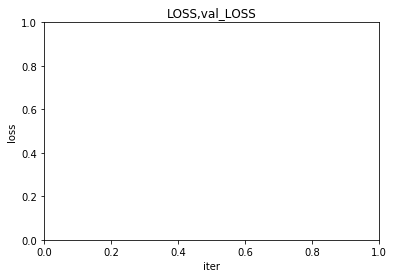

In [269]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,31), clf.rec_loss)
plt.plot(range(1,31), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [115]:
tes = np.array([[[1,1,2],[2,1,1]],
              [[2,1,1],[1,1,1]]])

In [119]:
tes.shape

(2, 2, 3)

In [118]:
np.random.randn(n2, na, 30).shape

(1, 2, 3)